In [118]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [120]:
path='/content/drive/MyDrive/data sets/daily-minimum-temperatures-in-me.csv'
df=pd.read_csv(path)

In [121]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [123]:
df['temp']=df['Daily minimum temperatures']

In [124]:
df.drop(columns='Daily minimum temperatures',inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   temp    3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [126]:
df=df.drop(566)

In [127]:
df=df.drop(565)

In [128]:
df=df.drop(1290)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3647 non-null   object
 1   temp    3647 non-null   object
dtypes: object(2)
memory usage: 85.5+ KB


In [130]:
df['Date'] = pd.to_datetime(df['Date'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3647 non-null   datetime64[ns]
 1   temp    3647 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 85.5+ KB


In [132]:
df.set_index('Date',inplace=True)

In [133]:
df.head()

,temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [134]:
df['temp']=df['temp'].astype(float)

<Axes: xlabel='Date'>

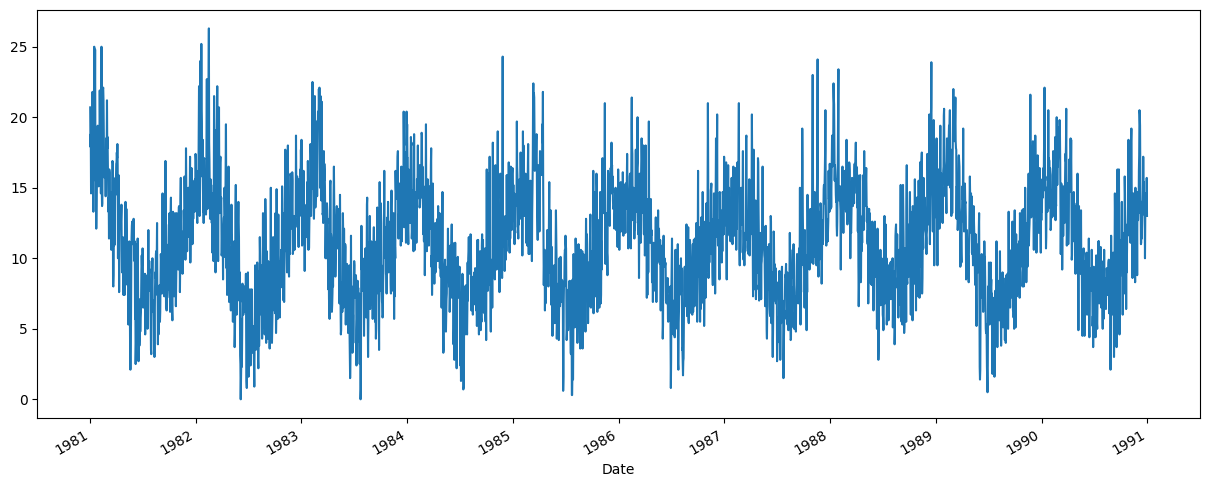

In [135]:
plt.figure(figsize=(15,6))
df['temp'].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ff4442a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ff4442f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ff4442770>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ff4443490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ff4443730>],
 'means': []}

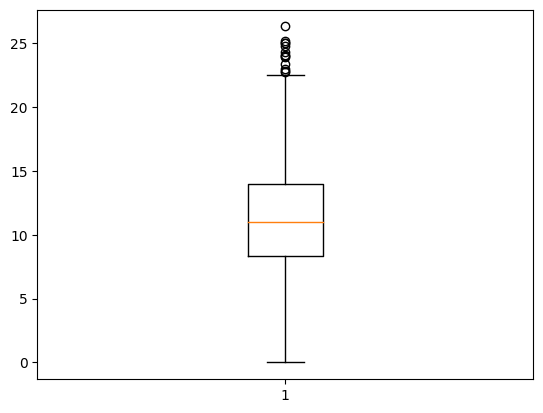

In [136]:
plt.boxplot(df['temp'])

In [137]:
df2 = df.resample('W').mean()

<Axes: xlabel='Date'>

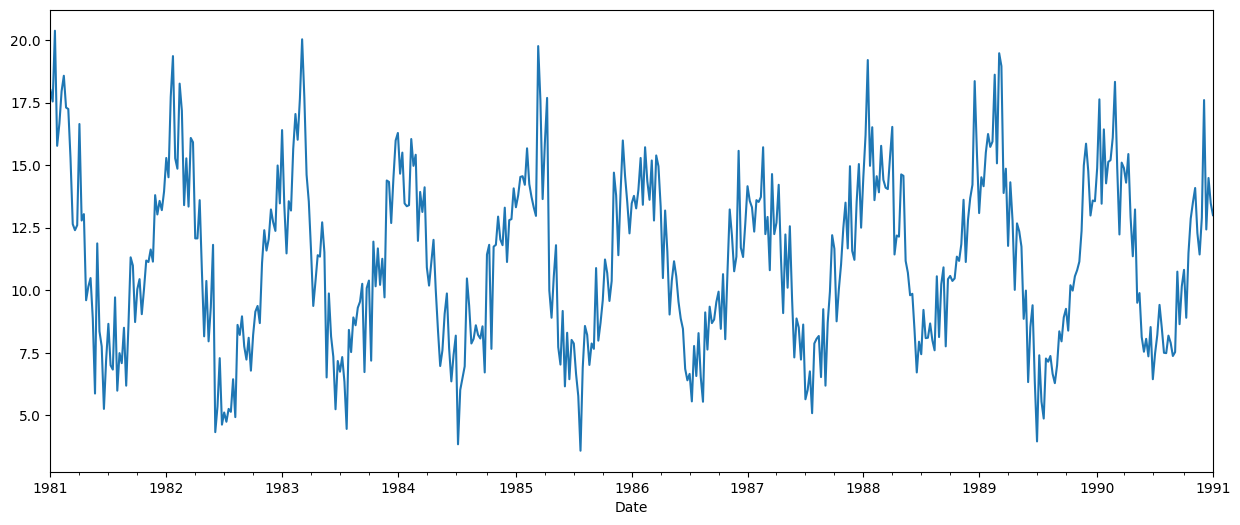

In [138]:
plt.figure(figsize=(15,6))
df2['temp'].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ff43c1bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ff43c2110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ff43c1930>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ff43c2650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ff43c28f0>],
 'means': []}

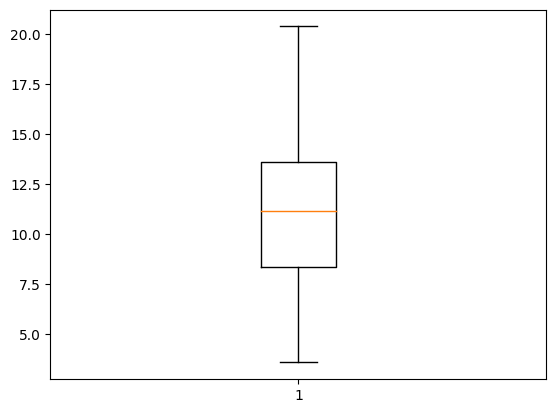

In [139]:
plt.boxplot(df2['temp'])

## WE WILL WORK WITH DF2 AND TRY TO SOLVE THE EQUATION USING LINEAR REGRESSION


<Axes: title={'center': 'Monthly rolling Average'}, xlabel='Date', ylabel='PM2.5'>

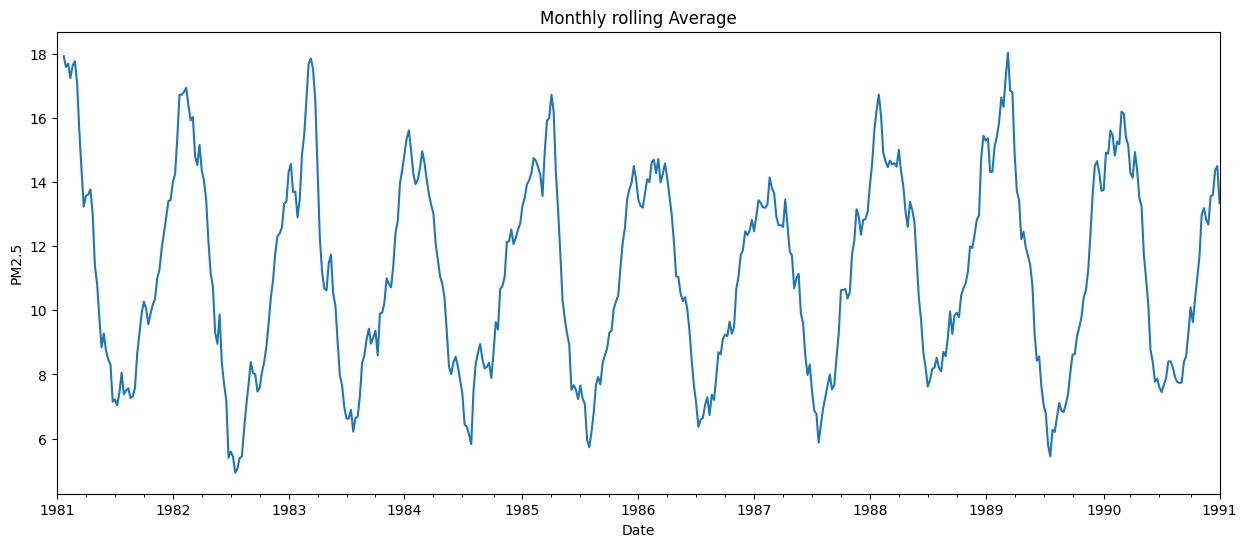

In [140]:
#Plotting the rolling average
plt.figure(figsize=(15,6))
df2["temp"].rolling(4).mean().plot(ylabel='PM2.5',title='Monthly rolling Average')

In [141]:
df2['temp.L1']=df2['temp'].shift(1)

In [142]:
df2.dropna(inplace=True)

In [143]:
target='temp'
y=df2[target]

In [144]:
y

Date
1981-01-11    17.542857
1981-01-18    20.371429
1981-01-25    15.771429
1981-02-01    16.657143
1981-02-08    17.957143
                ...    
1990-12-09    17.600000
1990-12-16    12.428571
1990-12-23    14.485714
1990-12-30    13.471429
1991-01-06    13.000000
Freq: W-SUN, Name: temp, Length: 522, dtype: float64

In [145]:
x=df2.drop(columns='temp')

In [146]:
x

,temp.L1
Date,
1981-01-11,18.000000
1981-01-18,17.542857
1981-01-25,20.371429
1981-02-01,15.771429
1981-02-08,16.657143
...,...
1990-12-09,12.900000
1990-12-16,17.600000
1990-12-23,12.428571


In [147]:
df2.corr()

,temp,temp.L1
temp,1.000000,0.823228
temp.L1,0.823228,1.000000


Text(0.5, 1.0, 'Comparison')

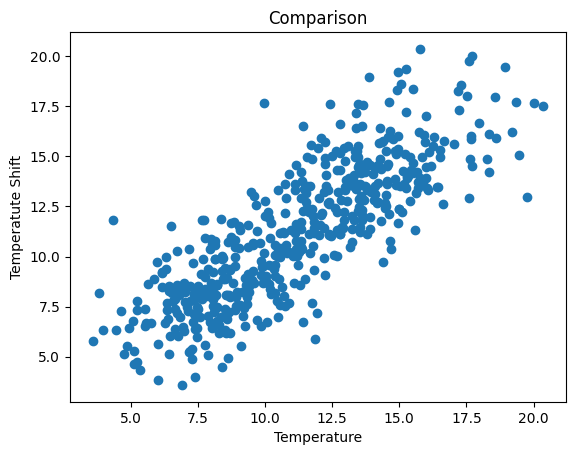

In [148]:
plt.scatter(x=df2['temp'],y=df2['temp.L1'])
plt.xlabel('Temperature')
plt.ylabel('Temperatute Shift')
plt.title('Comparison')

## Splitting the data into train and test

In [149]:
cutoff=int(len(x)*0.8)
cutoff

417

In [150]:
x_train,y_train=x.iloc[:417],y.iloc[:417]
x_test,y_test=x.iloc[417:],y.iloc[417:]

In [151]:
x_train

,temp.L1
Date,
1981-01-11,18.000000
1981-01-18,17.542857
1981-01-25,20.371429
1981-02-01,15.771429
1981-02-08,16.657143
...,...
1988-12-04,12.814286
1988-12-11,13.685714
1988-12-18,14.214286


In [152]:
len(x_test)

105

In [153]:
len(y_train)

417

In [154]:
len(y_test)

105

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Working with Training Data


In [157]:
y_pred_train=model.predict(x_train)

In [158]:
train_mae=mean_absolute_error(y_train,y_pred_train)

In [159]:
train_mae

1.5305641612822116

In [160]:
df_train=pd.DataFrame(
    {
        'y_train':y_train,'y_pred_train':y_pred_train
    }
)

In [161]:
df_train

,y_train,y_pred_train
Date,,
1981-01-11,17.542857,16.694434
1981-01-18,20.371429,16.323204
1981-01-25,15.771429,18.620188
1981-02-01,16.657143,14.884689
1981-02-08,17.957143,15.603946
...,...,...
1988-12-04,13.685714,12.483296
1988-12-11,14.214286,13.190953
1988-12-18,18.357143,13.620187


# Train Plot Linear Regression

In [162]:
px.line(df_train,labels={'value':'Temperature'})

## WORKING WITH THE TEST DATA

In [163]:
y_pred_test=model.predict(x_test)

In [164]:
test_mae=mean_absolute_error(y_test,y_pred_test)

In [165]:
test_mae

1.5040825620348663

In [166]:
# MAE in both test and train data is around 1.5 which is a good sign it means that the model works similar fot teat and train data

In [167]:
df_test=pd.DataFrame(
    {
        'y_test':y_test,'y_pred_test':y_pred_test
    }
)

In [168]:
df_test

,y_test,y_pred_test
Date,,
1989-01-08,14.514286,12.701780
1989-01-15,14.157143,13.863807
1989-01-22,15.500000,13.573784
1989-01-29,16.242857,14.664271
1989-02-05,15.728571,15.267519
...,...,...
1990-12-09,17.600000,12.552902
1990-12-16,12.428571,16.369608
1990-12-23,14.485714,12.170071


# Test Plot Linear Regression

In [169]:
px.line(df_test,labels={'value':'Temperature'})

## ACF plot and PACF plot for understanding Autoregression we will use df for this

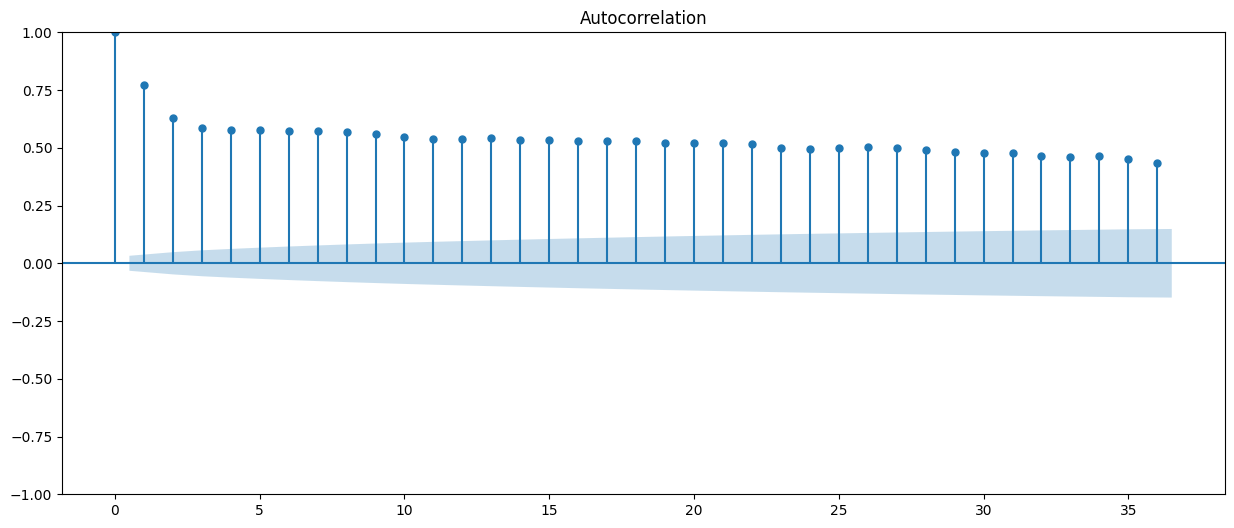

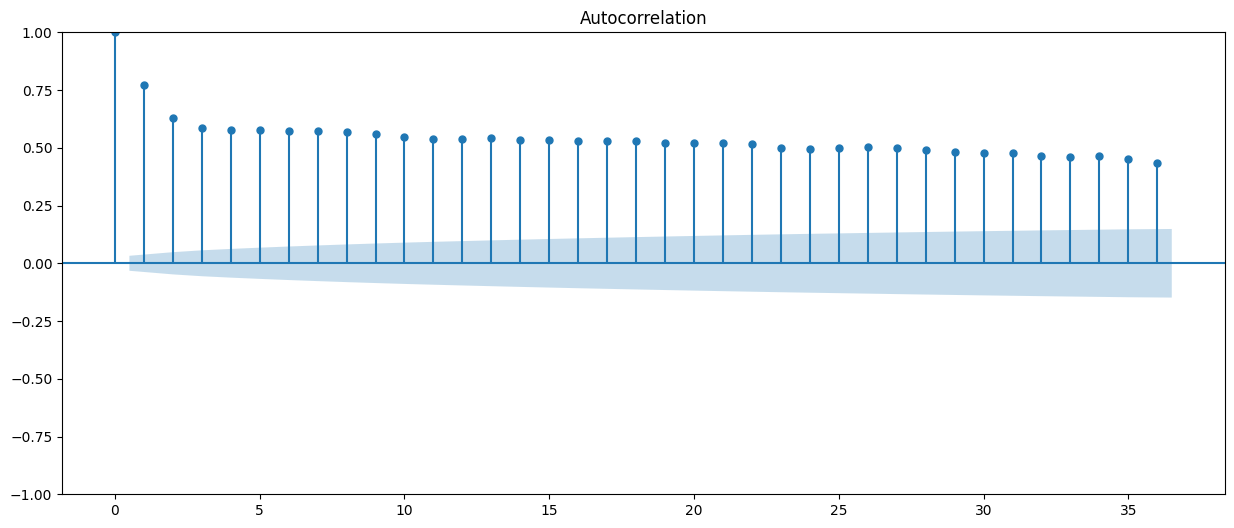

In [181]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df,ax=ax)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



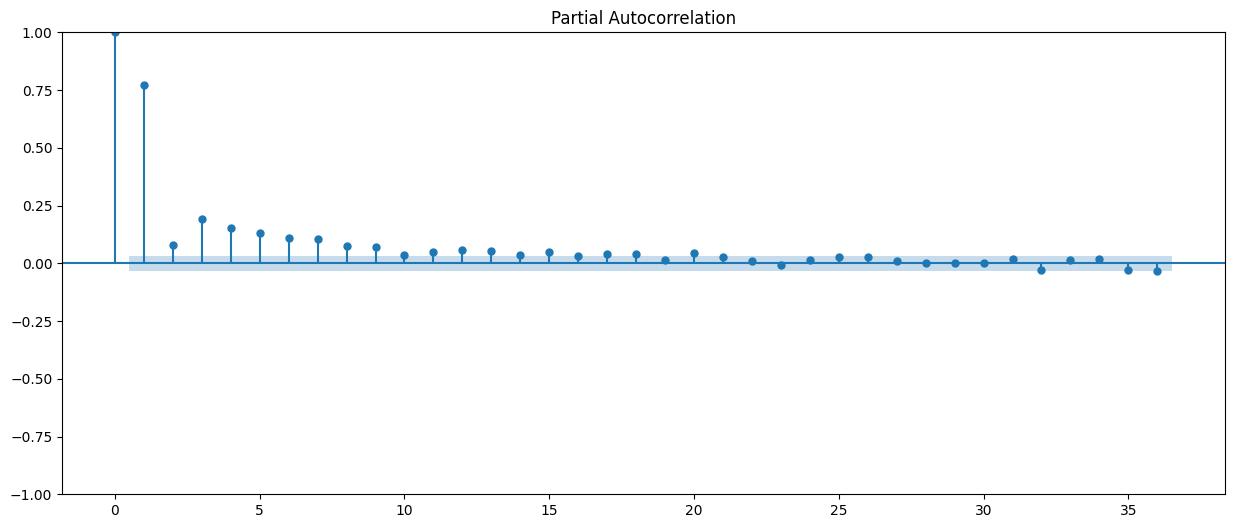

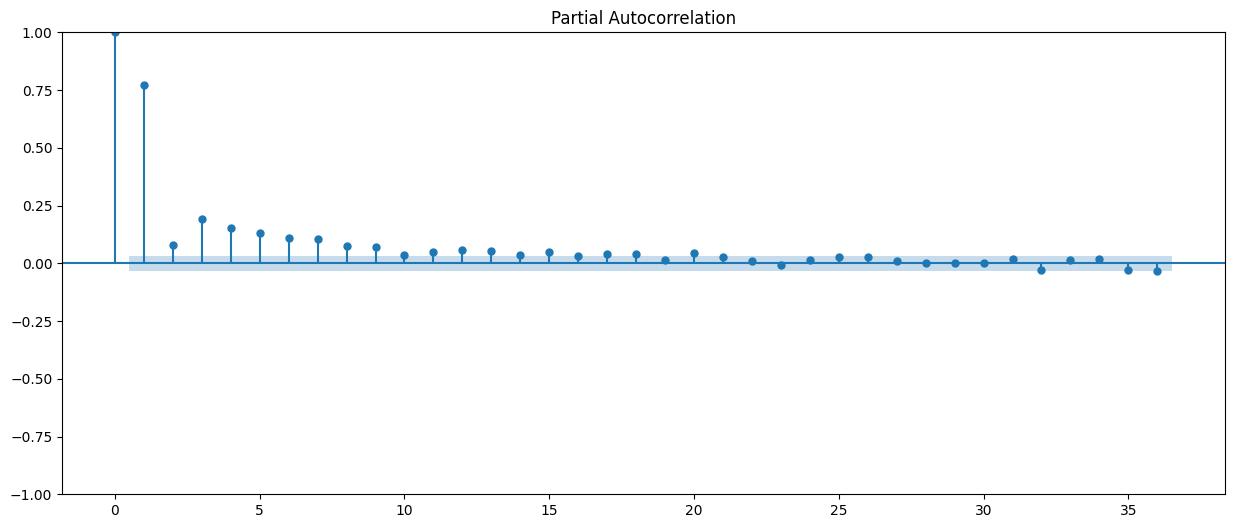

In [213]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df,ax=ax)

In [173]:
# We can use upto 19 lags when working with auto regression

In [187]:
df3 = df.resample('W').mean()

In [189]:
df3.head(2)

,temp
Date,
1981-01-04,18.000000
1981-01-11,17.542857


In [190]:
z=df3.squeeze()

In [191]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 1981-01-04 to 1991-01-06
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    523 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [192]:
z.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 523 entries, 1981-01-04 to 1991-01-06
Freq: W-SUN
Series name: temp
Non-Null Count  Dtype  
--------------  -----  
523 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [193]:
cutoff

417

In [194]:
z_train=z.iloc[:cutoff]
z_test=z.iloc[cutoff:]

In [195]:
z_train

Date
1981-01-04    18.000000
1981-01-11    17.542857
1981-01-18    20.371429
1981-01-25    15.771429
1981-02-01    16.657143
                ...    
1988-11-27    12.814286
1988-12-04    13.685714
1988-12-11    14.214286
1988-12-18    18.357143
1988-12-25    15.500000
Freq: W-SUN, Name: temp, Length: 417, dtype: float64

In [196]:
z_test

Date
1989-01-01    13.083333
1989-01-08    14.514286
1989-01-15    14.157143
1989-01-22    15.500000
1989-01-29    16.242857
                ...    
1990-12-09    17.600000
1990-12-16    12.428571
1990-12-23    14.485714
1990-12-30    13.471429
1991-01-06    13.000000
Freq: W-SUN, Name: temp, Length: 106, dtype: float64

In [197]:
model2=AutoReg(z_train,lags=19).fit()

In [199]:
z_pred = model2.predict().dropna()
training_mae = mean_absolute_error(z_train.iloc[19:],z_pred)
print("Training MAE:", training_mae)

Training MAE: 1.2539604309928398


## Training mean in Auto Reg is 1.2 which is lower than 1.5 that is the mean of Linear Reg

# Walk Forward Validation

In [202]:
z_pred_wfv=pd.Series()
history = z_train.copy()
for i in range(len(z_test)):
  model3=AutoReg(history,lags=19).fit()
  next_predict=model3.forecast()
  z_pred_wfv=z_pred_wfv.append(next_predict)
  history=history.append(z_test[next_predict.index])


<ipython-input-202-da66534b8436>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-202-da66534b8436>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-202-da66534b8436>:7: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-202-da66534b8436>:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-202-da66534b8436>:7: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-202-da66534b8436>:6: FutureWarning:

The series.append method is deprecated and will be removed fr

In [203]:
auto_reg_test_mae=mean_absolute_error(z_test,z_pred_wfv)
auto_reg_test_mae

1.3257606679462886

In [204]:
df_auto_test=pd.DataFrame(
    {
        "z_test":z_test,'z_pred_wfv':z_pred_wfv
    }
)

In [205]:
df_auto_test

,z_test,z_pred_wfv
1989-01-01,13.083333,14.143984
1989-01-08,14.514286,15.101812
1989-01-15,14.157143,14.873512
1989-01-22,15.500000,13.529027
1989-01-29,16.242857,14.591323
...,...,...
1990-12-09,17.600000,13.172713
1990-12-16,12.428571,14.755924
1990-12-23,14.485714,13.844751
1990-12-30,13.471429,15.149038


In [208]:
df_auto_train=pd.DataFrame(
    {
        'z_train':z_train.iloc[19:],'z_pred':z_pred
    }
)

# Training Plot

In [211]:
fig = px.line(df_auto_train,labels={'value':'Temperature'})
fig.show()

# Testing Plot

In [212]:
fig = px.line(df_auto_test,labels={'value':'Temperature'})
fig.show()

## MAE ON TRAIN DATA USING LINEAR REGRESSION 1.52
## MAE ON TEST DATA USING LINEAR REGRESSION 1.53
## MAE ON TRAIN DATA USING AUTO REGRESSION 1.25
## MAE ON TEST DATA USING AUTO REGRESSION 1.32